**Case Study: Analyzing User Screen Time**

Below are all the features in the data:
Date: Date of the record
Usage: Number of times the user used the smartphone in a day
Notifications: Number of notifications the user received in a day
Times opened: Number of times the app was opened by the user
App: The app that was opened by the user

**1. Data Exploration:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_df = pd.read_csv("/content/sample_data/Screentime-App-Details.csv")

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [5]:
data_df.isnull().sum()


Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

In [6]:
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%m/%d/%Y')


In [7]:
data_df.describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


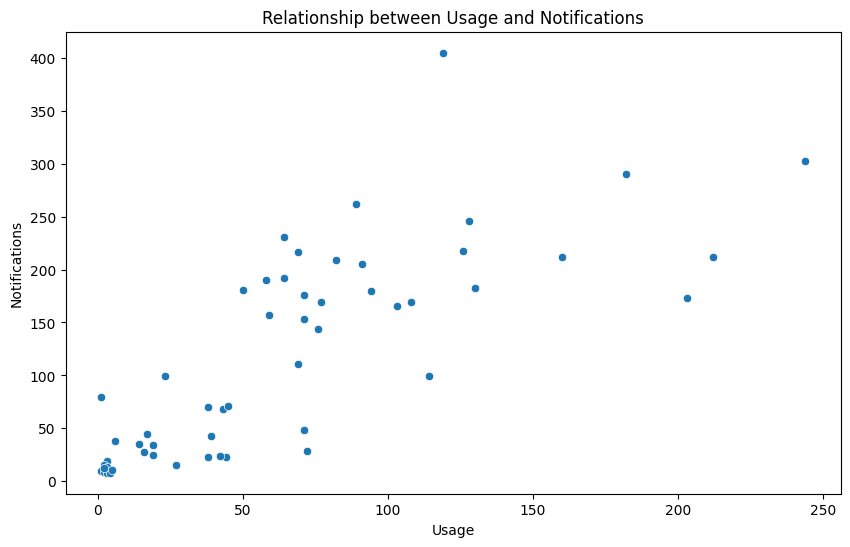

In [8]:
# Relationship between Usage and Notifications
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Usage', y='Notifications', data=data_df)
plt.title('Relationship between Usage and Notifications')
plt.xlabel('Usage')
plt.ylabel('Notifications')
plt.show()

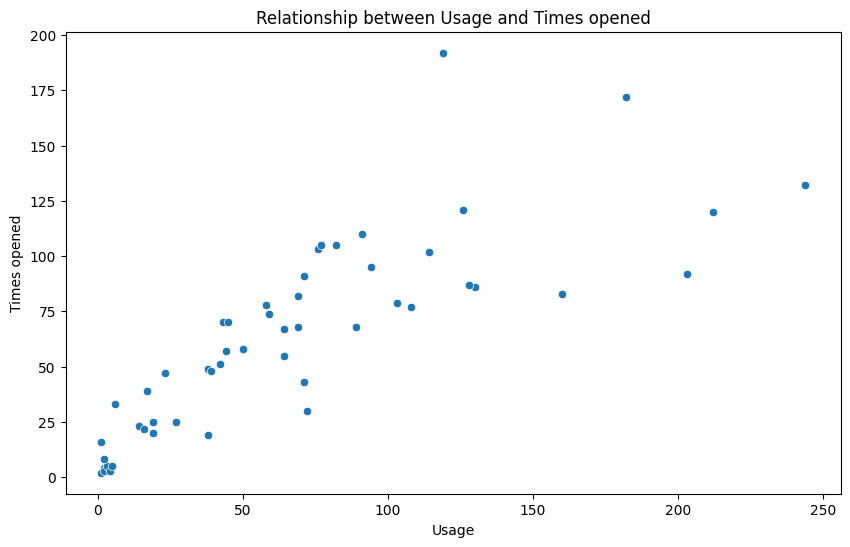

In [9]:
# Relationship between Usage and Times opened
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Usage', y='Times opened', data=data_df)
plt.title('Relationship between Usage and Times opened')
plt.xlabel('Usage')
plt.ylabel('Times opened')
plt.show()

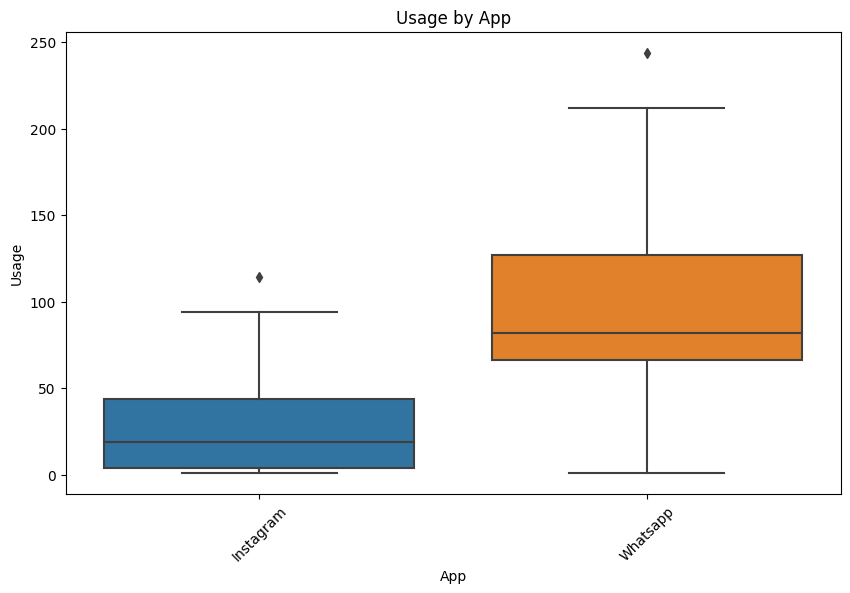

In [10]:
# Relationship between Usage and App
plt.figure(figsize=(10, 6))
sns.boxplot(x='App', y='Usage', data=data_df)
plt.title('Usage by App')
plt.xlabel('App')
plt.ylabel('Usage')
plt.xticks(rotation=45)
plt.show()

**2. Data Visualization:**

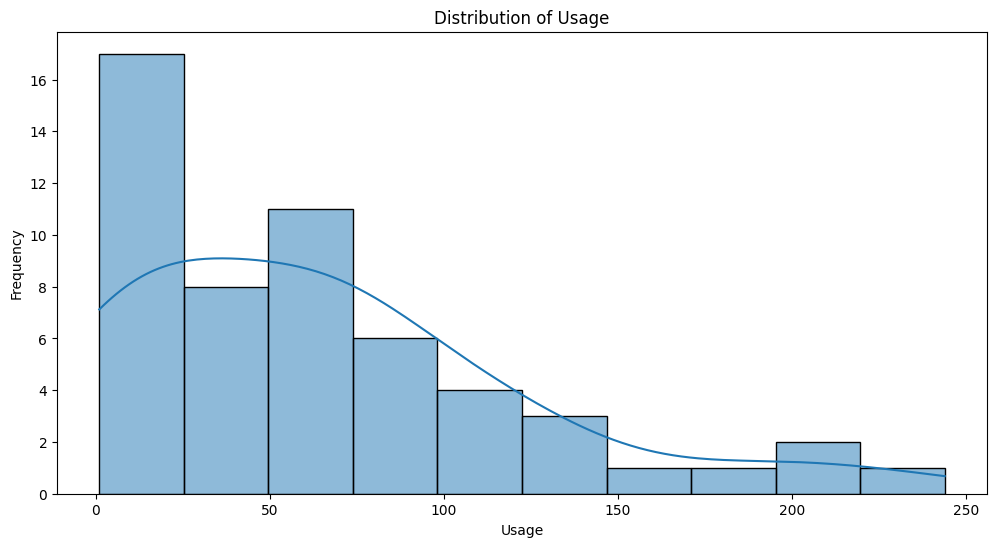

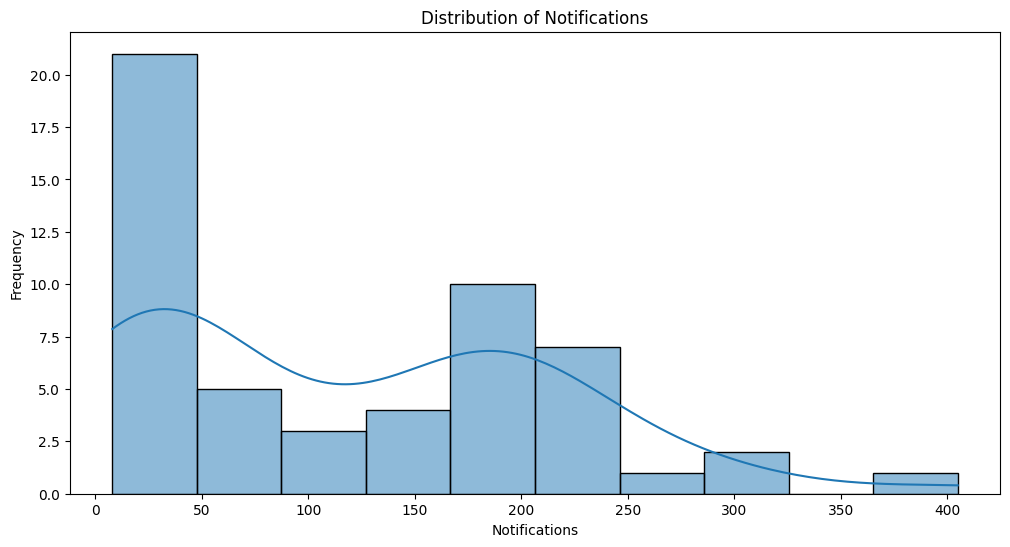

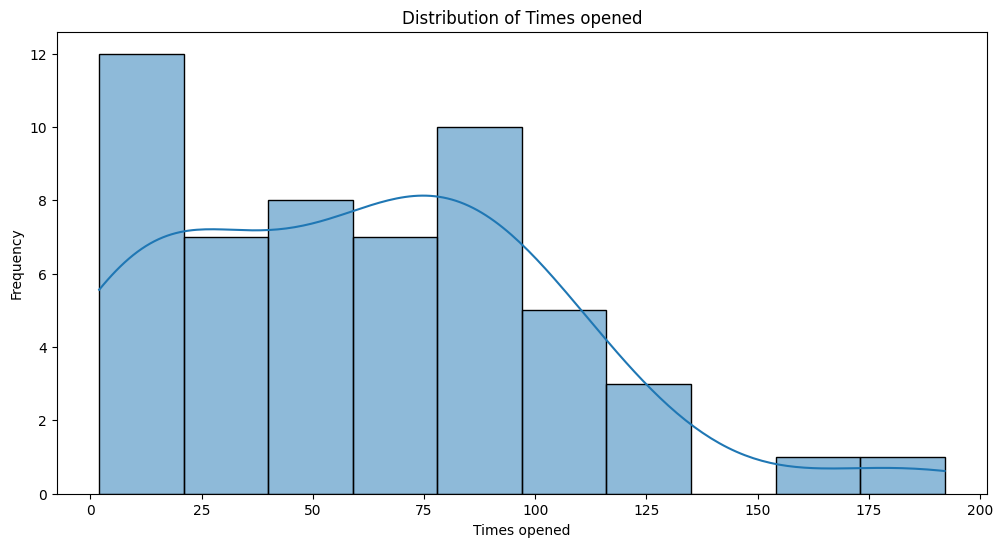

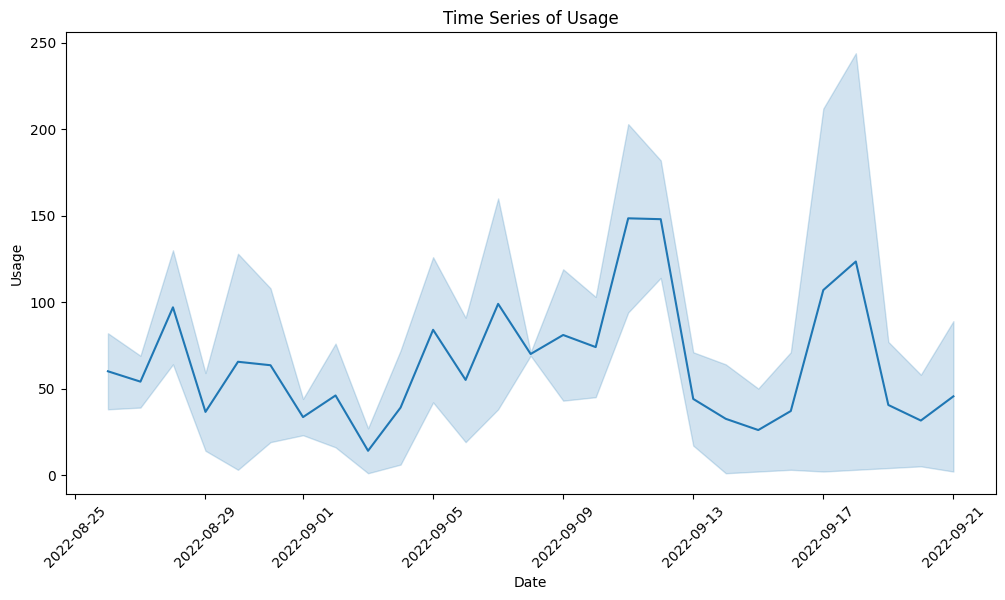

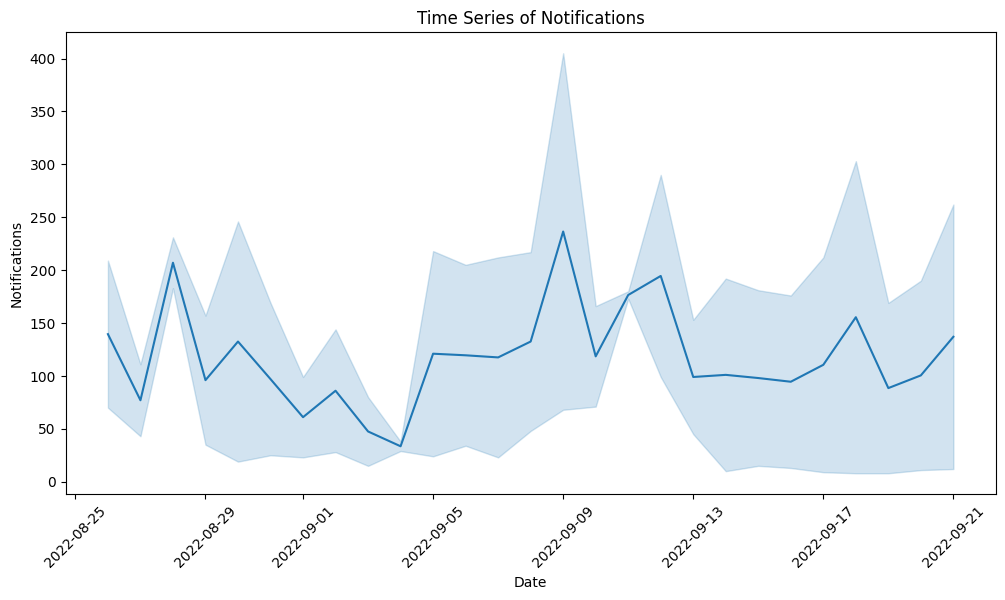

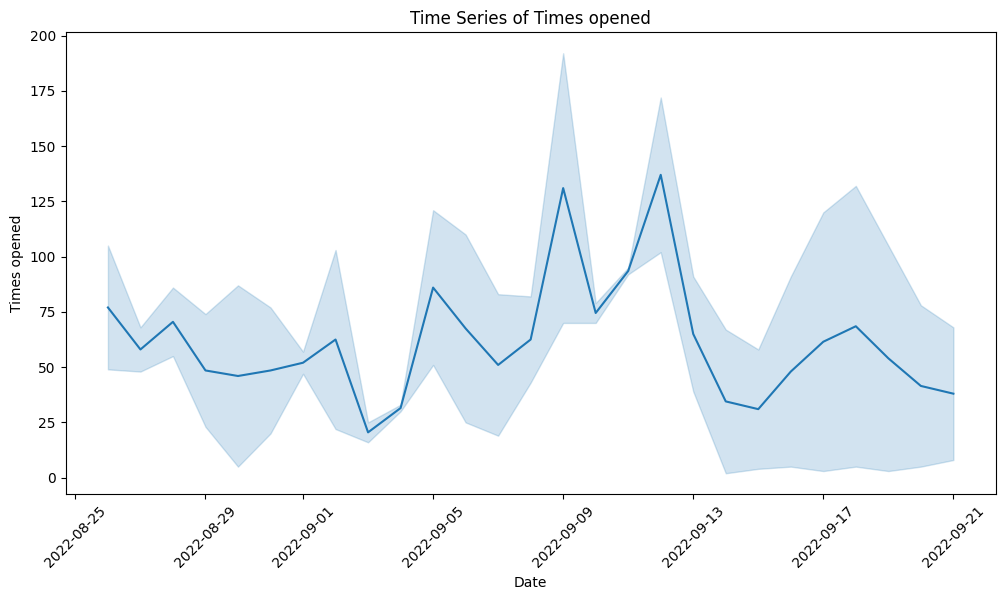

In [11]:
# Distribution of Usage
plt.figure(figsize=(12, 6))
sns.histplot(data_df['Usage'], bins=10, kde=True)
plt.title('Distribution of Usage')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.show()

# Distribution of Notifications
plt.figure(figsize=(12, 6))
sns.histplot(data_df['Notifications'], bins=10, kde=True)
plt.title('Distribution of Notifications')
plt.xlabel('Notifications')
plt.ylabel('Frequency')
plt.show()

# Distribution of Times opened
plt.figure(figsize=(12, 6))
sns.histplot(data_df['Times opened'], bins=10, kde=True)
plt.title('Distribution of Times opened')
plt.xlabel('Times opened')
plt.ylabel('Frequency')
plt.show()

# Time series plot for Usage over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Usage', data=data_df)
plt.title('Time Series of Usage')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.xticks(rotation=45)
plt.show()

# Time series plot for Notifications over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Notifications', data=data_df)
plt.title('Time Series of Notifications')
plt.xlabel('Date')
plt.ylabel('Notifications')
plt.xticks(rotation=45)
plt.show()

# Time series plot for Times opened over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Times opened', data=data_df)
plt.title('Time Series of Times opened')
plt.xlabel('Date')
plt.ylabel('Times opened')
plt.xticks(rotation=45)
plt.show()

**3. Correlation Analysis:**

<ipython-input-12-d86fadd11170>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_df.corr()


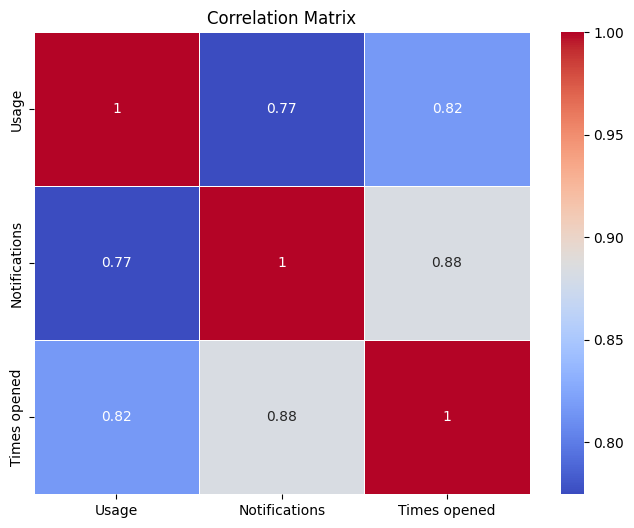

In [12]:
# Calculate correlations
correlation_matrix = data_df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

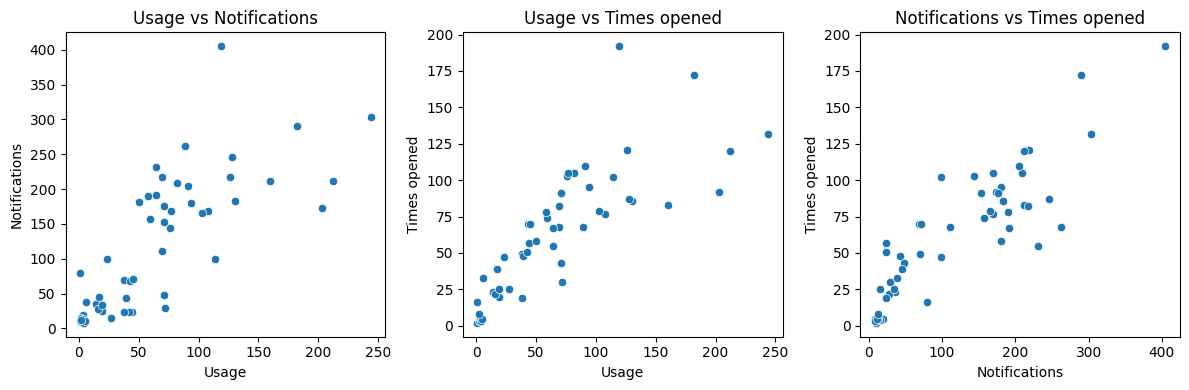

In [13]:
# Visualize correlations using scatter plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data_df, x='Usage', y='Notifications')
plt.title('Usage vs Notifications')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data_df, x='Usage', y='Times opened')
plt.title('Usage vs Times opened')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data_df, x='Notifications', y='Times opened')
plt.title('Notifications vs Times opened')

plt.tight_layout()
plt.show()

**4. App Analysis:**

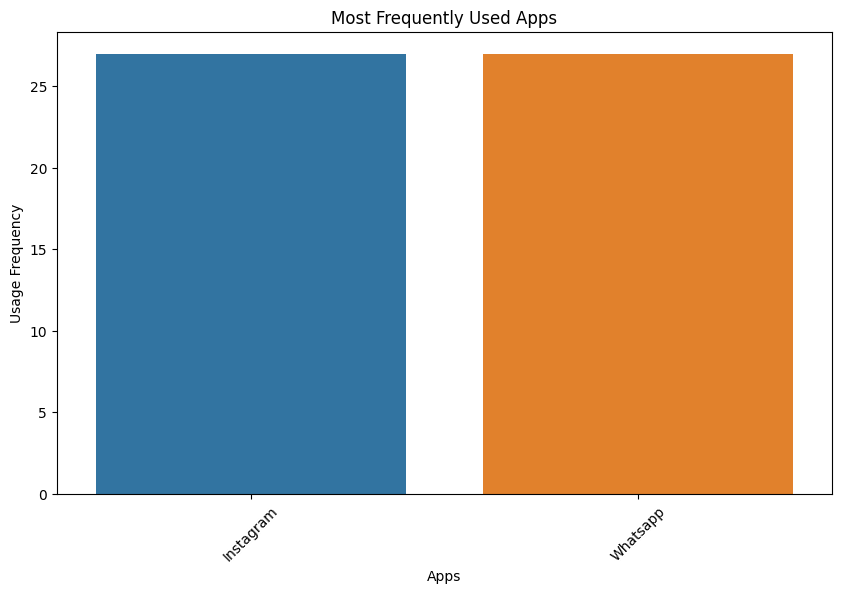

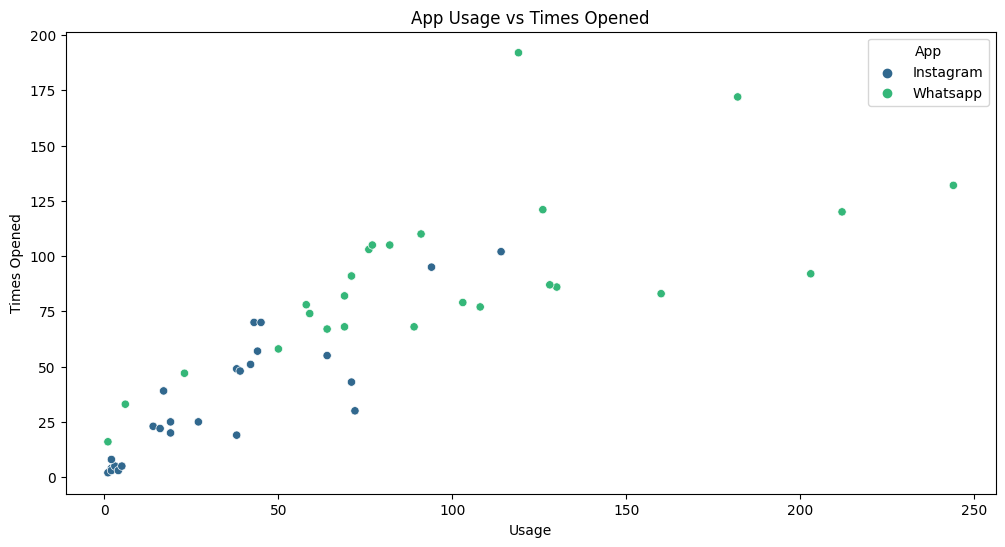

In [14]:
# Identify the most frequently used apps
top_apps = data_df['App'].value_counts()

# Plot a bar chart of the most frequently used apps
plt.figure(figsize=(10, 6))
sns.barplot(x=top_apps.index, y=top_apps.values)
plt.title('Most Frequently Used Apps')
plt.xlabel('Apps')
plt.ylabel('Usage Frequency')
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between app usage and overall screen time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_df, x='Usage', y='Times opened', hue='App', palette='viridis')
plt.title('App Usage vs Times Opened')
plt.xlabel('Usage')
plt.ylabel('Times Opened')
plt.show()


**5. Productivity Analysis:**

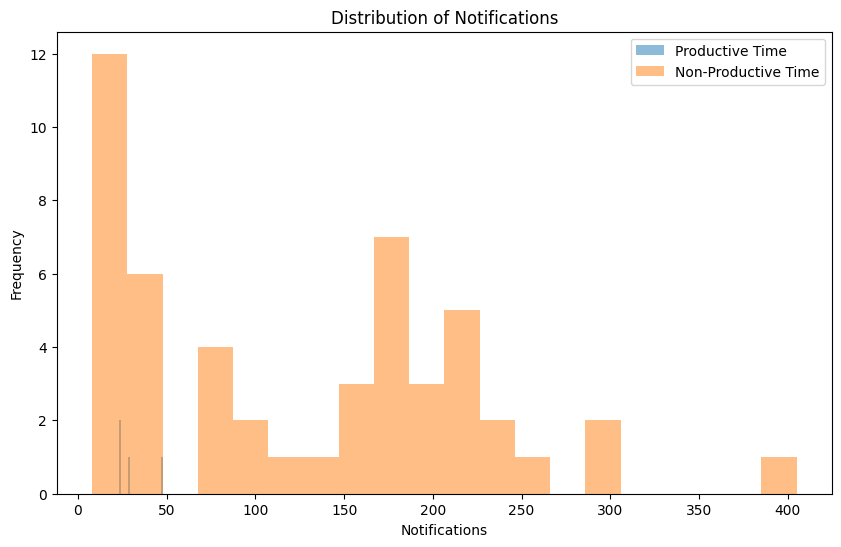

App Productivity (sorted by productive time percentage):
 App
Instagram    0.148148
Whatsapp     0.000000
Name: Productive, dtype: float64


In [18]:
# Define thresholds for productive time (customize as needed)
productive_threshold = 40  # Adjust this threshold as necessary

# Classify time as productive or non-productive
data_df['Productive'] = (data_df['Usage'] >= productive_threshold) & (data_df['Notifications'] <= 50)

# Calculate productive and non-productive time
productive_time = data_df[data_df['Productive']]['Usage'].sum()
non_productive_time = data_df[~data_df['Productive']]['Usage'].sum()

# Visualize the distribution of Notifications during productive and non-productive time
plt.figure(figsize=(10, 6))
plt.hist(data_df[data_df['Productive']]['Notifications'], alpha=0.5, label='Productive Time', bins=20)
plt.hist(data_df[~data_df['Productive']]['Notifications'], alpha=0.5, label='Non-Productive Time', bins=20)
plt.title('Distribution of Notifications')
plt.xlabel('Notifications')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# Analyze the impact of App Usage on productivity
app_productivity = data_df.groupby('App')['Productive'].mean().sort_values(ascending=False)
print("App Productivity (sorted by productive time percentage):\n", app_productivity)

**6. Hypothesis Testing:**

In [23]:
from scipy import stats

# Define a threshold to categorize days into high and low notifications
threshold = 50

# Split the data into two groups: high and low notifications
high_notifications = data_df[data_df['Notifications'] >= threshold]['Usage']
low_notifications = data_df[data_df['Notifications'] < threshold]['Usage']

# Perform a two-sample t-test to compare screen time between the two groups
t_stat, p_value = stats.ttest_ind(high_notifications, low_notifications)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print(f"The difference in screen time between high and low notifications is statistically significant (p-value: {p_value})")
else:
    print(f"There is no statistically significant difference in screen time between high and low notifications (p-value: {p_value})")

The difference in screen time between high and low notifications is statistically significant (p-value: 1.8302363653827444e-07)


**7. App Usage over Time and Notification over Time**

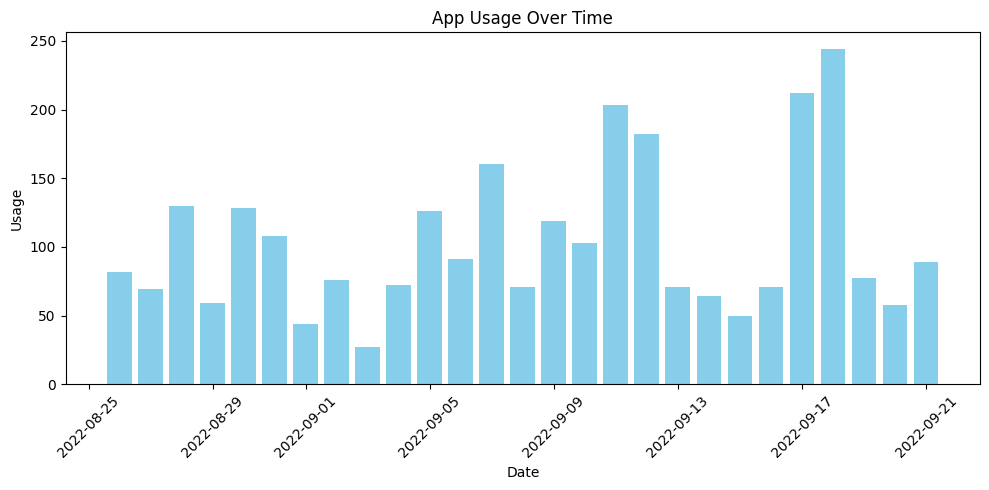

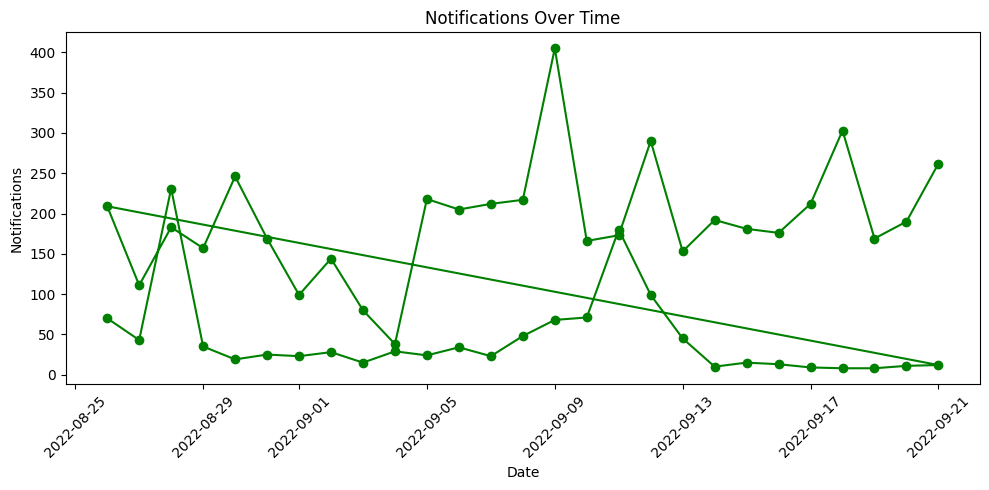

In [19]:
data_df.reset_index(drop=True, inplace=True)

# Bar chart for app usage
plt.figure(figsize=(10, 5))
plt.bar(data_df['Date'], data_df['Usage'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.title('App Usage Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Line chart for trends over time
plt.figure(figsize=(10, 5))
plt.plot(data_df['Date'], data_df['Notifications'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Notifications')
plt.title('Notifications Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
